<a href="https://colab.research.google.com/github/seunghy1468/Sparta_Coding_Machine_Learning/blob/main/homework_2_weeks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# homework 2 weeks 
# 이진논리회귀
# 연령, 혈압, 인슐린수치 등으로 당뇨병 진단 예측 모델
# outcome: y (0, 1), 나머지: x

import os
os.environ['KAGGLE_USERNAME'] = ''                # username
os.environ['KAGGLE_KEY'] = ''                     # key

!kaggle datasets download -d kandij/diabetes-dataset
!unzip diabetes-dataset.zip

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

  0% 0.00/8.92k [00:00<?, ?B/s]
100% 8.92k/8.92k [00:00<00:00, 15.9MB/s]
Archive:  diabetes-dataset.zip
  inflating: diabetes2.csv           


In [2]:
df = pd.read_csv('diabetes2.csv')
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


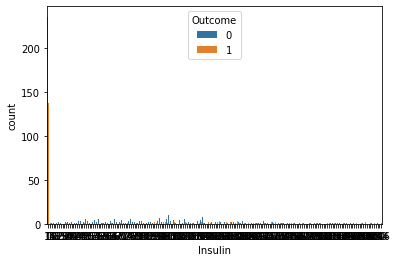

In [25]:
# insulin = 0일 경우, 당뇨병일 확률이 매우 높음 (당뇨병 x: 0, 당뇨병: 1)
sns.countplot(x='Insulin', hue='Outcome', data=df)

In [8]:
# 전처리
# 1.비어있는 행 있는지 확인
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [12]:
x_data = df.drop(columns=['Outcome'], axis=1)
x_data = x_data.astype(np.float32)
x_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.599998,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.299999,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.100000,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.099998,2.288,33.0


In [13]:
y_data = df[['Outcome']]
y_data = y_data.astype(np.float32)
y_data.head(5)

,Outcome
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0


In [14]:
# 표준화

scaler = StandardScaler()
# x data의 단위가 다 다르니까 표준화 한다.
x_data_scaled = scaler.fit_transform(x_data)

# 표준화 전과 후 비교
print(x_data.values[0])
print(x_data_scaled[0])

[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
[ 0.6399473   0.8483238   0.14964075  0.90726995 -0.6928905   0.20401257
  0.46849188  1.4259955 ]


In [15]:
# 반드시 학습 데이터와 검증 데이터 분할해야함
# 학습: 80%, 검증 20%
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

# 학습 데이터 개수: 614, 검증 데이터 개수: 8, features: 8, outcome: 1
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(614, 8) (154, 8)
(614, 1) (154, 1)


In [24]:
# logistic regression에서 sigmoid function 사용

model = Sequential([
# Dense: linear regression 1번 하고, sigmoid function 해라!
  Dense(1, activation='sigmoid')
])

# 이진논리회귀, metrics: loss값 만 보면 얼마나 학습이 잘 되는지 감이 안온다. 감이 잘 잡히도록 씀.
# acc: accuracy (0~1: 1에 가까울수록 정확도 100%)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['acc'])

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),     # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=100                          # epochs 복수형으로 쓰기! (100번 반복학습)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
20/20 [==============================] - 0s 9ms/step - loss: 9.8089 - acc: 0.5130 - val_loss: 8.0499 - val_acc: 0.4091
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 7.8544 - acc: 0.4267 - val_loss: 6.6849 - val_acc: 0.4481
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 6.2780 - acc: 0.4967 - val_loss: 5.4380 - val_acc: 0.4221
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 5.0086 - acc: 0.4902 - val_loss: 4.2066 - val_acc: 0.4740
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 4.0013 - acc: 0.4658 - val_loss: 3.7005 - val_acc: 0.5519
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 3.3086 - acc: 0.5016 - val_loss: 2.5827 - val_acc: 0.5000
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 2.5089 - acc: 0.5114 - val_loss: 2.1429 - val_acc: 0.5130
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 2.0658 - a